### *Author - Rukesh Varanasi*
***Task - Prediction Using Supervised Machine Learning***

**`Graduate Rotational Internship Program (GRIP) @ The Sparks Foundation`**

In [60]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Reading of data

In [36]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Sparks_Internship\Task_1\student_scores - student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
# Checking for the NaN's and Null values in the data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Vizualization

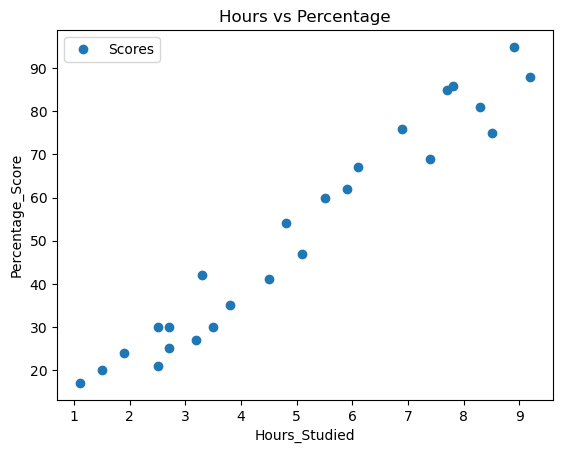

In [38]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours_Studied')  
plt.ylabel('Percentage_Score')  
plt.show()

- The graph shows a positive linear relation between study hours and score percentage.
- More hours studied means higher percentage of score, according to the graph.
- The graph indicates a direct proportionality between study hours and score percentage.

### Data Preprocessing

In [39]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

### Traing the Model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 
print("Training completed.")

Training completed.


### Plotting the Line of Regression

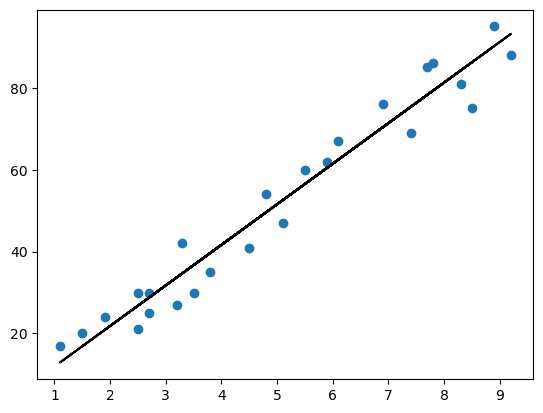

In [41]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='k');
plt.show()

### Prediction

In [42]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Actual vs Predicted

In [43]:
df_AvsP= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_AvsP

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


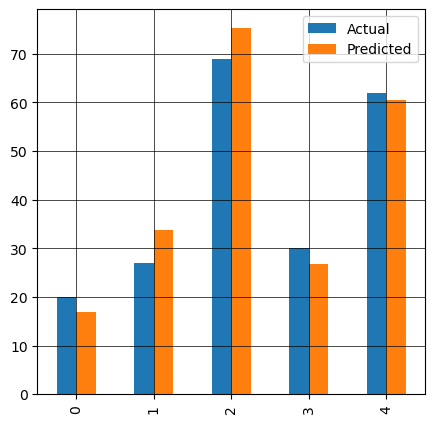

In [49]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df_AvsP.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='k')
plt.grid(which='minor', linewidth='0.5', color='r')
plt.show()

In [59]:
# Testing the model with our own data
hours=int(input("Enter the Hours Studied: "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("Predicted Score = {}".format(own_pred[0]))

Enter the Hours Studied: 6
Predicted Score = 61.4820989252881


### Model Evaluation

In [66]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


### Conclusion

**`R-2 is around 95%, which is very high`**
- This means the model explains 95% of the variation in the data
- This is a great result for this model